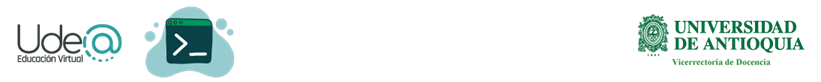

---
# Laboratorio Máquinas de Soporte Vectorial
## Modelos de clasificación

**Laboratorio Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

**Autores:**

* Pablo Alejandro Alvarado Duran, PhD.
*   Cristian David Ríos Urrego, MSc.
*   Diana Patricia Tobon Vallejo, PhD.

---
## Introducción

- Hasta ahora hemos estudiado modelos de aprendizaje de máquina que usan todas las observaciones de una base de datos $\lbrace(\mathbf{x}_n, y_n)\rbrace_{n=1}^{N}$, donde $\mathbf x_n \in \mathbb R^D$, $y_n \in \mathbb R$.

- Utilizar todos los datos durante el entrenamiento y/o predicción puede volverse inviable o muy costoso computacionalmente, debido al excesivo tiempo necesario para hacer operaciones.

- Las *máquinas de soporte vectorial* (SVM en inglés) son modelos que utilizan solo un subconjunto de datos de entrenamiento para hacer predicciones, por lo tanto, son mas eficientes computacionalmente.



---
## Formulación del modelo

### Clasificación bi-clase usando SVM

En este caso la salida $y_n$ puede tomar un conjunto finito de valores, es decir, es una variable discreta. En este caso, todos los puntos satisfacen las siguientes condiciones

$$
\mathbf{w}^{\intercal} \mathbf{x}_i+w_0 \geq +1 \quad para \quad y_i=+1
$$

$$
\mathbf{w}^{\intercal} \mathbf{x}_i+w_0\leq -1 \quad para \quad y_i=-1 
$$

Donde $y_i \in \lbrace -1, +1 \rbrace$ son las clases (etiquetas), $\mathbf{x}_i$ es el vector de caracteristicas, $\mathbf{w}$ es el vector normal al hiperplano de separación, $w_0$ es un bias, y $M$ es el número de muestras.

Por el momento asumiremos que los datos son separables de forma lineal, de manera que $f(\mathbf x_n) > 0 $ para datos que tengan su correspondiente etiqueta $y_n = 1$, y $f(\mathbf x_n) < 0 $ para datos que tengan su correspondiente etiqueta $y_n = -1$. Esto implica que

$$y_n \cdot f(\mathbf x_n) > 0, \ \forall \ n$$



<center><img src="Imagen1.png" width=500/></center>

Obsérvese que el margen en la figura anterior se define como:

$$
\frac{2}{\left \| \mathbf{w} \right \|_2}
$$

y se define como  la distancia perpendicular desde el origen al hiperplano de los puntos.

Para el caso de $y_i=+1$ es:

$$
\frac{(1-w_0)}{\left \| \mathbf{w} \right \|_2}
$$

y para el hiperplano de los puntos con $y_i=-1$ es:
$$
\frac{(-1-w_0)}{\left \| \mathbf{w} \right \|_2}
$$


Sin embargo, pueden haber múltiples soluciones a este problema de clasificación (fronteras de decisión). La solución óptima corresponde a la frontera que maximice el **margen**.

<center><img src="Imagen2.png" width=500/></center>


Por lo tanto, la maximización del margen SVM es la idea principal de este método. Comúnmente, esta maximización se reformula como el siguiente problema de optimización.

$$
\underset{\mathbf{w},w_0}{minimize} \quad \frac{1}{2}\left \| \mathbf{w} \right \|_2^{2}
$$

$$
Subject \ to \quad y_i(\mathbf{w}^{\intercal} \mathbf{x}_i+w_0) \geq 0 \quad i=1,2,\cdots M.
$$

Los puntos que cumplen:

$$
y_i(\mathbf{w}^{\intercal}\mathbf{x}_i+w_0)= 0
$$

son los encargados de construir el margen de decisión y se conocen como **vectores soporte**. En la Figura anterior están representados por un círculo alrededor de cada muestra.

---
## Soft-margin SVM

Sin embargo, en la mayoría de los casos prácticos, los datos no son perfectamente separables por un hiperplano lineal debido a ruido o solapamiento entre clases. Para abordar esta situación, se introducen las variables de holgura (slack variables), que permiten que algunos puntos se encuentren en el lado incorrecto del margen o incluso del hiperplano, penalizando estos errores en la función objetivo. De esta manera, se busca un equilibrio entre maximizar el margen y minimizar los errores de clasificación, logrando así un modelo más robusto y capaz de manejar datos no linealmente separables de manera efectiva.

<center><img src="Imagen3.png" width=800/></center>


Por lo tanto, es necesario incluir variables de holgura $\left \{ \zeta_i, i=1,2,\cdots M \right \}$, en las restricciones:

$$
\mathbf{w}^{\intercal}\mathbf{x}_i+w_0\geq +1-\zeta_i \quad para \quad y_i=+1
$$

$$
\mathbf{w}^{\intercal}\mathbf{x}_i+w_0\leq -1+\zeta_i \quad para \quad y_i=-1 
$$

$$
\zeta_i\geq 0 \quad  \quad i=1,\cdots,M
$$

Para que un punto esté mal clasificado por el hiperplano de separación, debemos tener $\zeta_i>1$. Esto se observa en la siguiente figura:

<center><img src="Imagen4.png" width=500/></center>


Finalmente, al introducir esta variable en la función objetivo, el problema de optimización es el siguiente:

$$
\underset{\mathbf{w},w_0,\zeta_i}{minimize} \quad \frac{1}{2}\left \| \mathbf{w} \right \|_2^{2} +C\sum_{i=1}^{M}\zeta_i
$$

donde el término $C\sum_{i=1}^{M}\zeta_i$ puede considerarse que mide cierta cantidad de clasificación errónea (flexibilidad).

---
## Kernel SVM

Aunque el uso de variables de holgura permite a las SVM manejar datos no linealmente separables en un espacio lineal, hay situaciones en las que las relaciones entre las clases son demasiado complejas para ser capturadas adecuadamente en un espacio lineal. Para abordar esta limitación, se introducen los **kernels**, que permiten a las SVM operar en un espacio de mayor dimensión sin necesidad de transformar explícitamente los datos. 

Pongamos un ejemplo para entender el **trick** del kernel con más detalle. Consideremos un problema de clasificación binaria en el que tenemos dos clases de puntos de datos: rojo y azul. Los datos no son linealmente separables en el espacio 2D. Podemos verlo en el gráfico siguiente:

<center><img src="Imagen5.png" width=600/></center>

Fuente: https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d


Para que estos datos sean linealmente separables, podemos utilizar el **kernel trick**. Al aplicar el kernel, transformamos los datos a un espacio de características de mayor dimensión en el que se vuelven linealmente separables. Esto lo podemos ver en el gráfico 3D, donde los puntos de datos rojos y azules han sido separados por un hiperplano en el espacio tridimensional:

El **kernel trick** es una potente técnica que permite a las SVM resolver problemas de clasificación no lineales mediante la asignación implícita de los datos de entrada a un espacio de características de mayor dimensión. Al hacerlo, nos permite encontrar un hiperplano que separa las diferentes clases de datos.

### Tipos de kernels

Entre los kernels más comunes se encuentran: el kernel lineal, polinomial, y el kernel de base radial (RBF), cada uno adaptado para capturar diferentes tipos de relaciones en los datos. 

Mediante el uso de kernels, las SVM pueden manejar eficientemente problemas no lineales, ampliando significativamente su capacidad para clasificar conjuntos de datos complejos.

<center><img src="Imagen6.png" width=700/></center>


---
# **Trabajo de laboratorio**

## Clasificación bi-clase
En este trabajo de laboratorio vamos a utilizar el módulo `sklearn.svm` para implementar diferentes modelos de clasificación binaria basados en máquinas de vectores de soporte. Exploraremos tres kernels diferentes:

- lineal (por defecto): $$k(\mathbf{x}_n, \mathbf{x}_m) = \langle \mathbf{x}_n, \mathbf{x}_m \rangle,$$
- polinomial: $$k(\mathbf{x}_n, \mathbf{x}_m) = (\gamma \langle \mathbf{x}_n, \mathbf{x}_m \rangle + r)^D,$$
- RBF: $$k(\mathbf{x}_n, \mathbf{x}_m) = \exp (-\gamma ||\mathbf{x}_n - \mathbf{x}_m ||^2).$$


Con este propósito, vamos a entrenar los modelos SVM sobre **tres** bases de datos sintéticas distintas, muestreadas a través del módulo `sklean.datasets`:

- `make_moons`
- `make_circles`
- `make_classification`.

Para cada caso generar 100 datos de manera que $\mathbf x_n \in \mathbb R^2$, $y_n \in \lbrace 0, 1 \rbrace$. Graficar los datos clasificados, así como la frontera de decisión del clasificador entrenado.

1. Cómo afecta el kernel utilizado a la forma de la frontera aprendida por el modelo SVM?
2. Qué parametros controla para cada kernel, que tanta influencia tiene tener un $C$ grande a un $C$ pequeño?
3. Qué puede concluir al comparar los resultados obtenidos con cada kernel?

## Clasificación multi-clase

Investigue (en `sklearn`) cómo extender las máquinas de soporte vectorial para que puedan ser utilizados en clasificación multi-clase, y aplique un modelo SVM con kernel RBF a la base de datos Iris de sklearn, donde el vector de entrada sea de dimensión 2, es decir $\mathbf x_n \in \mathbb R^2$. Entrene minimo 3 diferentes modelos, de manera que cada uno utilice un valor diferente para el parámetro $\gamma$ del kernel RBF.

1. Cuál es la relación entre los valores de los parámetros del kernel y la forma de la frontera (y curvas de nivel) del modelo entrenado? Argumente su respuesta.
2. Logro discriminar efectivamente las clases? Con cual parametro de C y $\gamma$ cree que tiene mejor clasificación?


## Bi-clase

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles, make_classification

seed = np.random.seed(182) # blink

In [2]:
# Generar bases de datos sintéticas
x_moons, y_moons = make_moons(noise=0.1 ,random_state=seed)

x_circles, y_circles = make_circles(noise=0.1 ,random_state=seed)

x_class, y_class = make_classification(n_features=2,
                                       n_redundant=0,
                                       n_informative=2,
                                       n_clusters_per_class=1,
                                       random_state=seed)

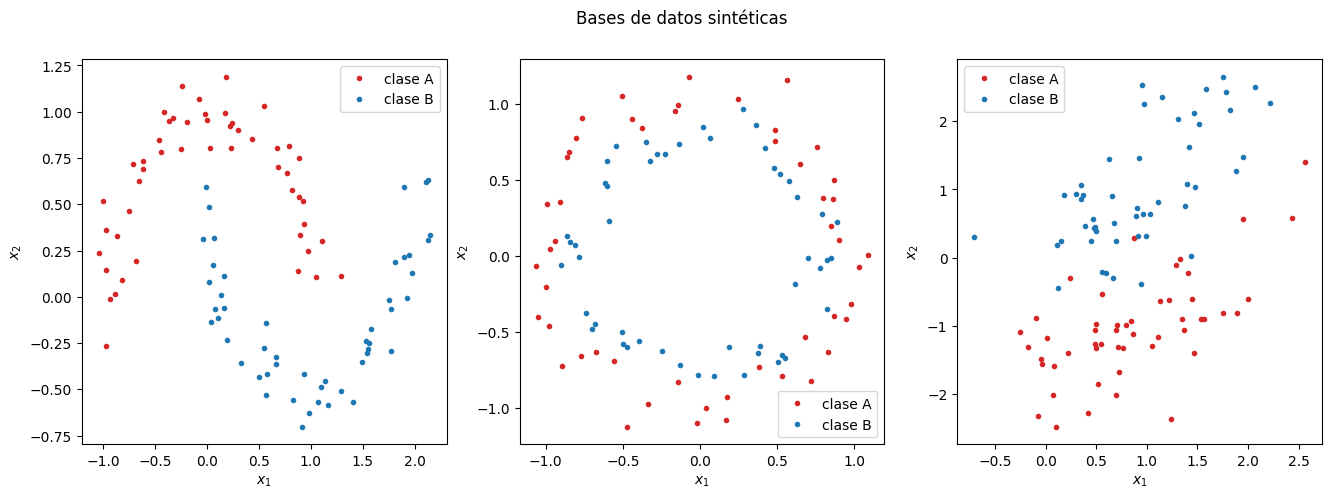

In [3]:
# vizualizar bases de datos
def plot_data(x, y):
    plt.plot(x[y==0,0], x[y==0,1], 'C3.', label='clase A')
    plt.plot(x[y==1,0], x[y==1,1], 'C0.', label='clase B')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()

plt.figure(figsize=(16,5))
plt.suptitle("Bases de datos sintéticas")

plt.subplot(1,3,1)
plot_data(x_moons, y_moons)

plt.subplot(1,3,2)
plot_data(x_circles, y_circles)

plt.subplot(1,3,3)
plot_data(x_class, y_class)

## Multi-clase

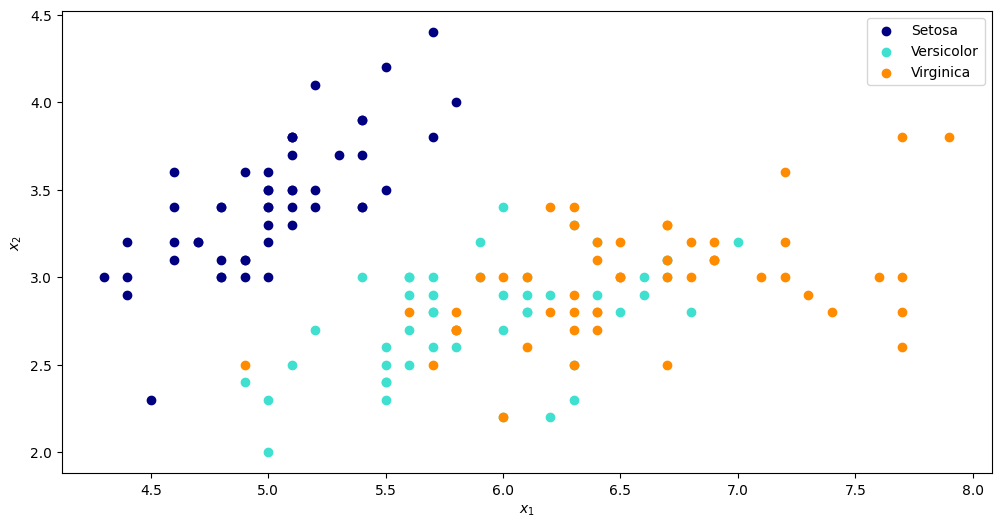

In [4]:
from sklearn import datasets
colors = ["navy", "turquoise", "darkorange"]

iris = datasets.load_iris()

x_mult = iris.data
y_mult = iris.target

plt.figure(figsize=(12,6))
for n, color in enumerate(colors):
    data = x_mult[y_mult == n]
    plt.scatter(data[:, 0], data[:, 1], color=color)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(["Setosa", "Versicolor", "Virginica"])
plt.show()

---
## Bibliografía
- Imágenes tomadas de: Pattern Recognition and Machine Learning, Christopher M. Bishop. https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf (libro original gratis).

- Mathematics for Machine Learning, Marc Peter Deisenroth. https://mml-book.github.io/ (libro original gratis).

- Machine Learning: A Probabilistic Perspective, Kevin P. Murphy.

- Módulo Support Vector Machines de `sklearn`. https://scikit-learn.org/stable/modules/svm.html

- Ejemplo comparador de clasificadores usando `sklearn` https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py